## NON LINEAR SVR 

In [17]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from warnings import filterwarnings
filterwarnings('ignore')

In [18]:
import numpy as np 
import pandas as pd

np.random.seed(3)

x_sim = np.random.uniform(2 , 10 , 145)
y_sim = np.sin(x_sim) + np.random.normal(0 , 0.4 , 145)


x_outliers = np.arange(2.5 , 5 , 0.5)
y_outliers = -5*np.ones(5)


x_sim_idx = np.argsort(np.concatenate([x_sim , x_outliers]))
x_sim = np.concatenate([x_sim , x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim , y_outliers])[x_sim_idx]

In [19]:
from sklearn.linear_model import LinearRegression 
ols =LinearRegression()
ols.fit(np.sin(x_sim[: , np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[: , np.newaxis]))

from sklearn.svm import SVR 
eps = 0.1 
svr=SVR(kernel='rbf' , epsilon = eps )
svr.fit(x_sim[: , np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[: , np.newaxis])

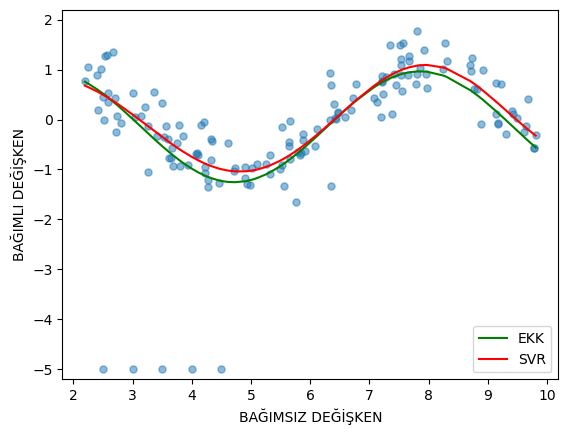

In [20]:
import matplotlib.pyplot as plt

plt.scatter(x_sim , y_sim , alpha = 0.5 , s=26)
plt_ols , = plt.plot (x_sim , ols_pred , 'g')
plt_svr , = plt.plot (x_sim , svr_pred , color = "r")
plt.xlabel("BAĞIMSIZ DEĞİŞKEN")
plt.ylabel("BAĞIMLI DEĞİŞKEN")
plt.ylim(-5.2 , 2.2)
plt.legend([plt_ols , plt_svr] , ["EKK" , "SVR"] , loc=4 ) ; 

In [21]:


df=pd.read_csv(r"C:\Users\dilara\Downloads\miuul makine ogrenmesi\datasets\hitters.csv")
df=df.copy()
df=df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.25, 
                                                    random_state=42)

In [23]:
svr_rbf = SVR(kernel="rbf").fit(X_train , y_train)

## PREDICT

In [24]:
y_pred = svr_rbf.predict(X_test)

In [25]:
np.sqrt(mean_squared_error(y_test , y_pred))

460.0032657244849

## MODEL TUNING

In [26]:
svr_rbf

SVR()

In [28]:
svr_params = {"C" : [0.1 , 0.4 , 5 , 10 , 20 , 30 , 40 , 50] }
svr_cv_model = GridSearchCV(svr_rbf , svr_params , cv=10 )
svr_cv_model.fit(X_train , y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [30]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [32]:
svr_tuned = SVR(kernel="rbf" , C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train ,
                                                                              y_train)

In [33]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test , y_pred))

428.00406888095694